In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers,datasets,models
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
 X_train[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

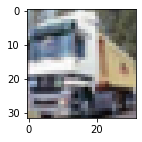

In [5]:
plt.figure(figsize=(15,2)) 
plt.imshow(X_train[1])
plt.show()

In [6]:
y_train=y_train.reshape(-1,)
y_train[:10]

array([6, 9, 9, 4, 1, 1, 2, 7, 8, 3], dtype=uint8)

In [7]:
cat = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
cat[2]

'bird'

In [9]:
def plot(X,y,ind):
    plt.figure(figsize=(10,2))
    plt.imshow(X[ind])
    plt.xlabel(cat[y[ind]])
    plt.show()

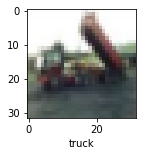

In [10]:
plot(X_train,y_train,2)

In [11]:
X_train=X_train / 255
X_test = X_test / 255

In [16]:
y_train.shape

(50000,)

In [19]:
cnn = models.Sequential([
    #cnn
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

cnn.fit(X_train[:1500],y_train[:1500],epochs=5)

Train on 1500 samples
Epoch 1/5
1500/1500 [==============================] - 113s 75ms/sample - loss: 2.2546 - accuracy: 0.1580
Epoch 2/5
1500/1500 [==============================] - 111s 74ms/sample - loss: 2.0351 - accuracy: 0.2500
Epoch 3/5
1500/1500 [==============================] - 112s 74ms/sample - loss: 1.9152 - accuracy: 0.2993
Epoch 4/5
1500/1500 [==============================] - 114s 76ms/sample - loss: 1.7521 - accuracy: 0.3693
Epoch 5/5
1500/1500 [==============================] - 113s 75ms/sample - loss: 1.6393 - accuracy: 0.4107


In [20]:
cnn.evaluate(X_test,y_test)

10000/10000 [==============================] - 302s 30ms/sample - loss: 1.7460 - accuracy: 0.3798


[1.7460237316131593, 0.3798]

In [21]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

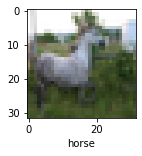

In [27]:
plot(X_test,y_test,69)

In [30]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[0.00850505, 0.07134772, 0.12969656, 0.217033  , 0.09077935,
        0.11676442, 0.30807588, 0.02477644, 0.00605645, 0.0269651 ],
       [0.17210889, 0.24399385, 0.00967346, 0.0103806 , 0.00249861,
        0.00104864, 0.0014778 , 0.00345028, 0.25534752, 0.3000203 ],
       [0.1609832 , 0.23612216, 0.03704148, 0.04838844, 0.01921139,
        0.01250437, 0.00614501, 0.01579286, 0.23056343, 0.23324762],
       [0.28670955, 0.18721922, 0.07857424, 0.02594968, 0.01948487,
        0.00563269, 0.00607809, 0.01217535, 0.24554212, 0.1326343 ],
       [0.00238035, 0.00696382, 0.13082299, 0.13408764, 0.2209319 ,
        0.15025409, 0.26077718, 0.08158693, 0.00276395, 0.00943117]],
      dtype=float32)

In [31]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[6, 9, 1, 0, 6]

In [32]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [34]:
cat[y_classes[3]]

'airplane'

In [36]:
from sklearn.metrics import classification_report
print('Classification Report: \n',classification_report(y_test,y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.35      0.44      1000
           1       0.48      0.45      0.47      1000
           2       0.25      0.23      0.24      1000
           3       0.23      0.23      0.23      1000
           4       0.34      0.30      0.32      1000
           5       0.33      0.36      0.35      1000
           6       0.42      0.61      0.50      1000
           7       0.42      0.42      0.42      1000
           8       0.51      0.23      0.32      1000
           9       0.36      0.61      0.46      1000

    accuracy                           0.38     10000
   macro avg       0.39      0.38      0.37     10000
weighted avg       0.39      0.38      0.37     10000

